# Draw a bounding box around the foreground object (using template matching)

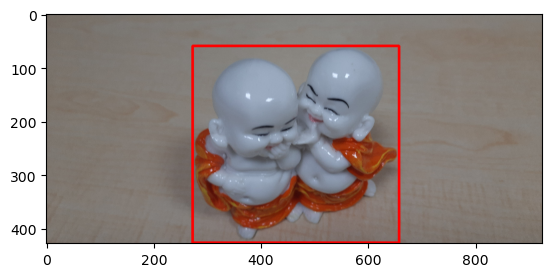

In [10]:
import cv2
import matplotlib.pyplot as plt

#at first I crooped the foreground object from the original image 
#then saved it as 'template.jpg'
template = cv2.imread('template.jpg',0)
template = cv2.resize(template,(0,0), fx=0.2,fy=0.2)

h,w = template.shape

# Template matching methods
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED,
           cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:
    img = cv2.imread('InputUngradedAssignment1.jpg',1)
    img = cv2.resize(img, (0,0), fx=0.2,fy=0.2)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    result = cv2.matchTemplate(gray, template, method) #using convolution
    min_val , max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    #In these two methods most matched area with template happens to be min_loc
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:  
        location = min_loc
    else:
        location = max_loc #location is the top left corner of the rectangle

    bottom_right = (location[0]+w , location[1]+h) 
    cv2.rectangle(img, location, bottom_right , (0,0,255) , 3) 
    
    
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    
    cv2.imshow('Image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Convert to gray-scale and detect edges using Canny edge detection method

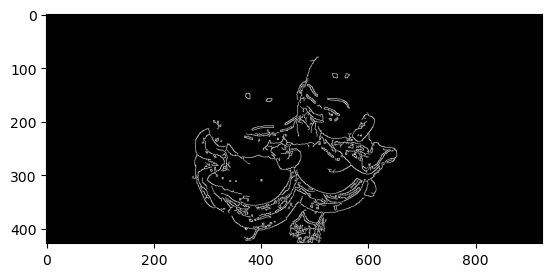

In [11]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('InputUngradedAssignment1.jpg',1)
img = cv2.resize(img, (0,0), fx=0.2,fy=0.2)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
output = cv2.Canny(gray,0,150)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)

# Use K-means for segmentation on the RGB image, and display the segmented region

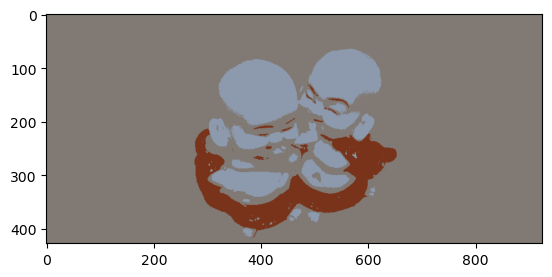

In [12]:
import cv2
import numpy as np
img = cv2.imread('InputUngradedAssignment1.jpg',1)
img = cv2.resize(img, (0,0), fx=0.2,fy=0.2)
new_img = img.reshape((-1,3))
new_img = np.float32(new_img)
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
K=3
ret,label,center=cv2.kmeans(new_img,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
img = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)
plt.imshow(img)